## 퍼셉트론
가장 오래되고 단순한 형태의 판별함수 기반 예측 모형

1. 1을 포함하는 입력요소 $x_i$에 가중치 $w_i$를 곱한 값이 판별함수 $f(x)$
1. 판별함수의 값이 활성화 함수 $a(z)$를 지나면 출력 $y = 1 or -1$ 생성

예측 오차를 최소화하는 가중치 w를 계산해야함

가중치에 따라 달라지는 전체 예측 오차 E는 i번째 개별 데이터에 대한 손실 합으로 표현
$$E(w) = \sum_i L(\hat{y}_i, y_i)$$
여기에서는 다음과같은 손실함수 사용
$$L(\hat{y}_i, y_i) = \max(0, -\hat{y}_iy_i)$$
- 미분의 용이를 위해 $\hat{y}$대신 판별함수 값 $ w^Tx$ 사용한다(같은 최적점).

### 퍼셉트론 손실 함수

$$E(w) = - \sum_{i \in M} w^Tx_i y_i$$
M은 오분류된 데이터 집합

여기에서 E(w) 오차를 최소화하는 w를 찾기 위해 미분

$$ \dfrac{dE}{dw} = - \sum_{i \in M} x_i y_i$$

gradient descent

$$\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray}$$
언제까지? 오차가 0이 될 때까지

### SGD
정확한 gradient 대신 일부 표본 데이터만 사용한 gradient이용. ->계산량이 줄어듦

다만, 최적점을 찾아도 멈추질 못함

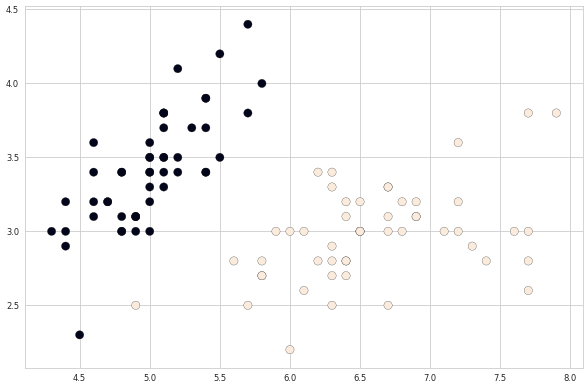

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()

In [2]:
from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = Perceptron(max_iter=n, eta0=0.1, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

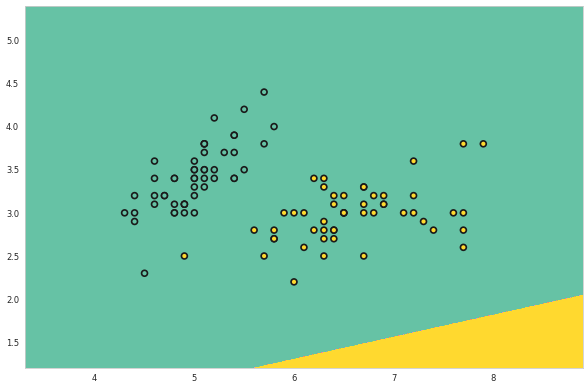

In [3]:
plot_perceptron(1)

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=500, eta0=0.1, random_state=1).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

---

SGDClassifier

In [5]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = SGDClassifier(loss="hinge", max_iter=n, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', linewidth=2, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)    
    plt.grid(False)
    plt.show()

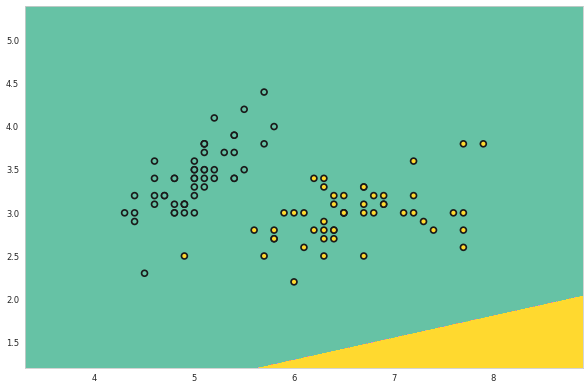

In [6]:
plot_sgd(1)

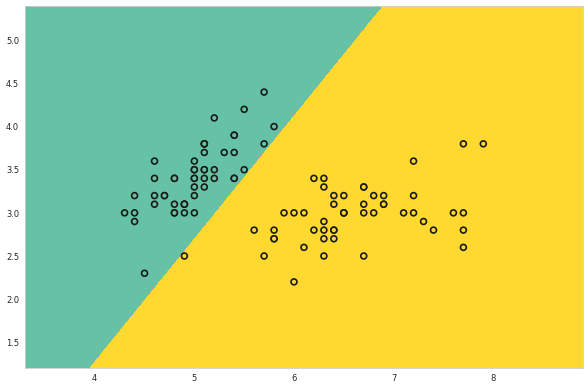

In [7]:
plot_sgd(1000)

---